In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
import yfinance as yf

start = '2010-01-01'
end = '2023-03-17'

df = yf.download('BAJFINANCE.NS', start=start, end=end)

print(df.head())

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2010-01-04  32.324509  33.509838  32.324509  33.334953  30.750973  466064
2010-01-05  34.010201  34.073353  32.645130  33.111488  30.544828  318779
2010-01-06  33.130920  34.102501  32.567402  33.587563  30.983997  192881
2010-01-07  33.995628  33.995628  32.936604  33.383530  30.795776  138876
2010-01-08  33.432110  34.879765  33.271797  33.990768  31.355949  312696


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-10,5865.000000,5887.399902,5781.000000,5874.149902,5874.149902,770861
2023-03-13,5869.000000,5947.500000,5811.000000,5833.549805,5833.549805,793356
2023-03-14,5840.000000,5850.000000,5716.149902,5731.549805,5731.549805,1372565
2023-03-15,5800.000000,5820.000000,5701.000000,5718.750000,5718.750000,679473
2023-03-16,5729.700195,5755.000000,5665.000000,5715.100098,5715.100098,884963


In [4]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,32.324509,33.509838,32.324509,33.334953,30.750973,466064
1,2010-01-05,34.010201,34.073353,32.645130,33.111488,30.544828,318779
2,2010-01-06,33.130920,34.102501,32.567402,33.587563,30.983997,192881
3,2010-01-07,33.995628,33.995628,32.936604,33.383530,30.795776,138876
4,2010-01-08,33.432110,34.879765,33.271797,33.990768,31.355949,312696


In [5]:
# rename the 'Adj Close' column to 'Adj_Close'
df = df.rename(columns={'Adj Close': 'Adj_Close'})

In [6]:
# drop the 'Date' and 'Adj_Close' columns from the DataFrame
df = df.drop(['Date', 'Adj_Close'], axis=1)

print(df.head())

        Open       High        Low      Close  Volume
0  32.324509  33.509838  32.324509  33.334953  466064
1  34.010201  34.073353  32.645130  33.111488  318779
2  33.130920  34.102501  32.567402  33.587563  192881
3  33.995628  33.995628  32.936604  33.383530  138876
4  33.432110  34.879765  33.271797  33.990768  312696


In [7]:
# print the column names to check for case sensitivity
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [8]:
df.head()

,Open,High,Low,Close,Volume
0,32.324509,33.509838,32.324509,33.334953,466064
1,34.010201,34.073353,32.645130,33.111488,318779
2,33.130920,34.102501,32.567402,33.587563,192881
3,33.995628,33.995628,32.936604,33.383530,138876
4,33.432110,34.879765,33.271797,33.990768,312696


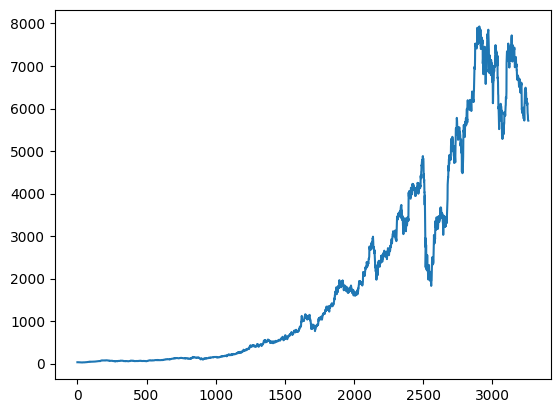

In [9]:
plt.plot(df.Close)

In [10]:
df

,Open,High,Low,Close,Volume
0,32.324509,33.509838,32.324509,33.334953,466064
1,34.010201,34.073353,32.645130,33.111488,318779
2,33.130920,34.102501,32.567402,33.587563,192881
3,33.995628,33.995628,32.936604,33.383530,138876
4,33.432110,34.879765,33.271797,33.990768,312696
...,...,...,...,...,...
3256,5865.000000,5887.399902,5781.000000,5874.149902,770861
3257,5869.000000,5947.500000,5811.000000,5833.549805,793356
3258,5840.000000,5850.000000,5716.149902,5731.549805,1372565
3259,5800.000000,5820.000000,5701.000000,5718.750000,679473


In [11]:
#taking MA 100 (moving averege mean value for 100 values)usinf rolling function
ma100 = df.Close.rolling(100).mean()

In [12]:
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3256    6488.204507
3257    6472.636006
3258    6456.147505
3259    6439.011006
3260    6424.234507
Name: Close, Length: 3261, dtype: float64

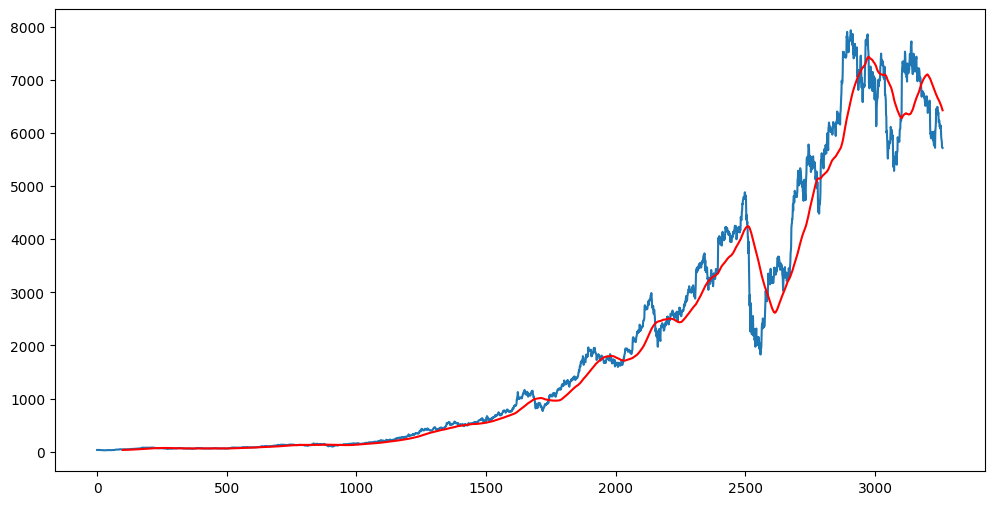

In [13]:
#now plotting this moving avg on the closing graph
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [14]:
#now taking moving avg for 200 days of data
ma200 = df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3256    6549.373259
3257    6549.404009
3258    6548.972759
3259    6547.599009
3260    6545.618508
Name: Close, Length: 3261, dtype: float64

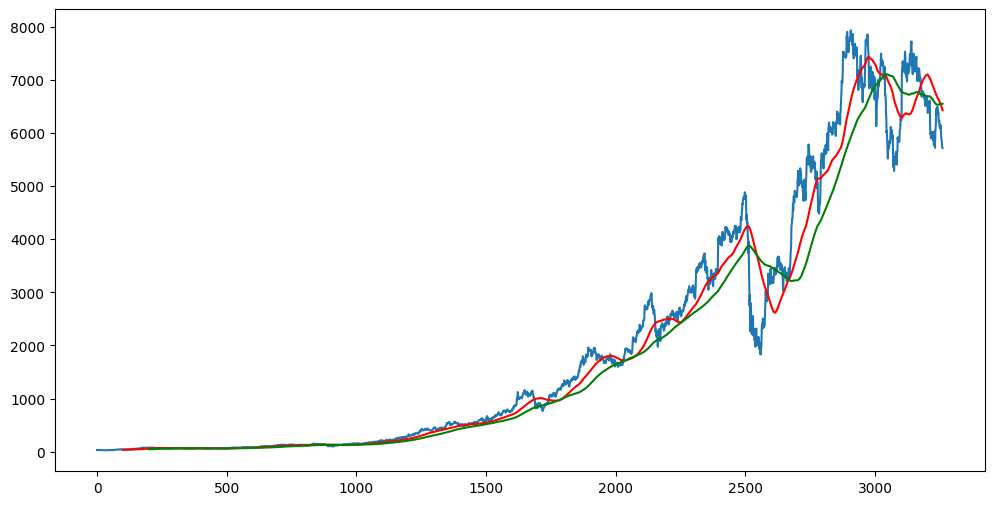

In [15]:
#now plotting this 200 days moving avg on the closing graph
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [16]:
#lets check how many coloumns and row we have till now
df.shape

(3261, 5)

In [17]:
#splitting data into training and Testing so here 70% is training data and rest 30 % is the testing data

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2282, 1)
(979, 1)


In [18]:
#training data 70%
data_training.head()

,Close
0,33.334953
1,33.111488
2,33.587563
3,33.383530
4,33.990768


In [19]:
#testing data 30%
data_testing.head()

,Close
2282,3039.449951
2283,3114.199951
2284,3024.100098
2285,3008.699951
2286,2998.350098


In [ ]:
#so here we have splitted the data successfully into train set and test set


In [20]:
# now for the stacked lstm model we have to scale down the data ( between 0-1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [21]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00185973],
       [0.00178591],
       [0.00194317],
       ...,
       [0.98224605],
       [1.        ],
       [0.9969612 ]])

In [22]:
data_training_array.shape

(2282, 1)

In [23]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [24]:
x_train.shape

(2182, 100, 1)

In [25]:
#ml model

In [26]:
from keras.layers import Dense,Dropout , LSTM
from keras.models import Sequential

In [27]:
#layer 1 
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


#layer 2
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))



#layer 3
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))





#layer 5
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))



#adding/connecting all the layers
model.add(Dense(units = 1))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [29]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
69/69 [==============================] - 19s 171ms/step - loss: 0.0225
Epoch 2/50
69/69 [==============================] - 11s 155ms/step - loss: 0.0056
Epoch 3/50
69/69 [==============================] - 11s 153ms/step - loss: 0.0051
Epoch 4/50
69/69 [==============================] - 10s 151ms/step - loss: 0.0043
Epoch 5/50
69/69 [==============================] - 11s 155ms/step - loss: 0.0036
Epoch 6/50
69/69 [==============================] - 11s 155ms/step - loss: 0.0034
Epoch 7/50
69/69 [==============================] - 11s 157ms/step - loss: 0.0035
Epoch 8/50
69/69 [==============================] - 12s 170ms/step - loss: 0.0035
Epoch 9/50
69/69 [==============================] - 11s 157ms/step - loss: 0.0030
Epoch 10/50
69/69 [==============================] - 11s 157ms/step - loss: 0.0033
Epoch 11/50
69/69 [==============================] - 11s 162ms/step - loss: 0.0029
Epoch 12/50
69/69 [==============================] - 11s 160ms/step - loss: 0.0029
Epoch 13/50
6

In [30]:
model.save('keras_model.h5')

In [31]:
#NOW WE WILL MOVE TO TESTING DATA
data_testing.head()

,Close
2282,3039.449951
2283,3114.199951
2284,3024.100098
2285,3008.699951
2286,2998.350098


In [32]:
#for predicting the values for this testing data we need previous 100 days entry so we will take previous 100 days data from data training
data_training.tail(100)

,Close
2182,2339.750000
2183,2348.399902
2184,2375.350098
2185,2277.600098
2186,2285.000000
...,...
2277,2945.250000
2278,2995.850098
2279,3001.449951
2280,3055.199951


In [33]:
#now we the data we will append it and test 
past_100_days = data_training.tail(100)

In [34]:
#final_df = past_100_days.append(data_testing, ignore_index=True)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [35]:
# so for now  we have appended the past 100 days data of training and testing

In [36]:
# now lets check for final df
final_df.head()

,Close
0,2339.750000
1,2348.399902
2,2375.350098
3,2277.600098
4,2285.000000


In [37]:
# now we have to scale this data
input_data = scaler.fit_transform(final_df)
input_data

array([[0.08372539],
       [0.08514334],
       [0.08956119],
       ...,
       [0.63973082],
       [0.6376326 ],
       [0.63703428]])

In [38]:
#now the rows are scaled down between 0-1

In [39]:
input_data.shape

(1079, 1)

In [40]:
#now we have 1079 rows and 1 coloumn

In [41]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [42]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(979, 100, 1)
(979,)


In [43]:
# Making Prediction

y_predicted = model.predict(x_test)

31/31 [==============================] - 2s 48ms/step


In [44]:
y_predicted.shape

(979, 1)

In [45]:
y_test

array([0.19842467, 0.21067816, 0.19590842, 0.19338393, 0.19168732,
       0.19980167, 0.19340034, 0.19560514, 0.19728539, 0.19432651,
       0.19052342, 0.19770341, 0.20721114, 0.20523581, 0.20783406,
       0.20768651, 0.21355508, 0.21029296, 0.19758046, 0.19475273,
       0.17905678, 0.1872613 , 0.17931088, 0.18078621, 0.17258989,
       0.19240858, 0.20999788, 0.24131602, 0.25876598, 0.26298708,
       0.26554431, 0.25388096, 0.26865891, 0.26556072, 0.25913481,
       0.25904465, 0.2709129 , 0.2685278 , 0.27573236, 0.27902725,
       0.26620822, 0.27547006, 0.27713394, 0.28242056, 0.27487995,
       0.28121569, 0.27693719, 0.26842943, 0.27544549, 0.27810109,
       0.28745309, 0.28471553, 0.28135504, 0.2870105 , 0.29489533,
       0.29723129, 0.30360805, 0.30654231, 0.30852584, 0.30923069,
       0.31203384, 0.30984541, 0.25970856, 0.29082179, 0.2622904 ,
       0.26589678, 0.25383998, 0.25951185, 0.26551153, 0.26790487,
       0.26861793, 0.2449224 , 0.23238204, 0.23734897, 0.22040

In [46]:
y_predicted

array([[0.18761589],
       [0.18952264],
       [0.19140859],
       [0.19326328],
       [0.19508061],
       [0.19681957],
       [0.19848935],
       [0.20006035],
       [0.20153463],
       [0.20289719],
       [0.20416899],
       [0.20537765],
       [0.20654081],
       [0.20763683],
       [0.2086613 ],
       [0.20963739],
       [0.21057774],
       [0.21149096],
       [0.2124026 ],
       [0.21329959],
       [0.214169  ],
       [0.21496014],
       [0.21563607],
       [0.21616673],
       [0.21653402],
       [0.2167215 ],
       [0.21674356],
       [0.21665525],
       [0.21655346],
       [0.21655098],
       [0.2167698 ],
       [0.21729256],
       [0.21816045],
       [0.21939059],
       [0.22104368],
       [0.2230945 ],
       [0.22547698],
       [0.22817807],
       [0.23111647],
       [0.23427574],
       [0.23771563],
       [0.24139161],
       [0.24529868],
       [0.2493382 ],
       [0.25352004],
       [0.25772345],
       [0.26186338],
       [0.265

In [47]:
# all the values are scaled down so now we have to scale them up
scaler.scale_

array([0.00016393])

In [48]:
scale_factor = 1/0.00016393
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

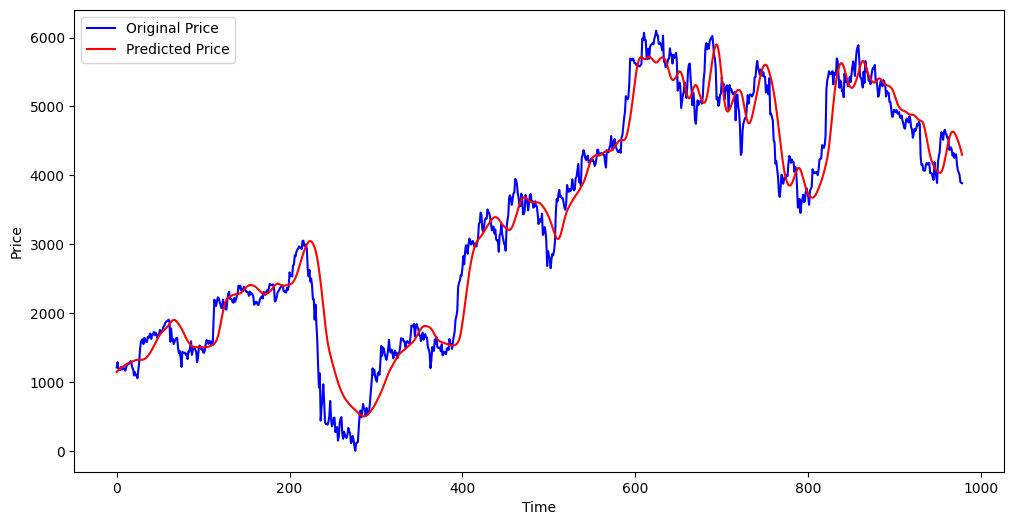

In [49]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()